In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import os
from tqdm import tqdm
from sklearn.preprocessing import minmax_scale

# Orignal waveform

In [3]:
c1="data/Control/002.wav"

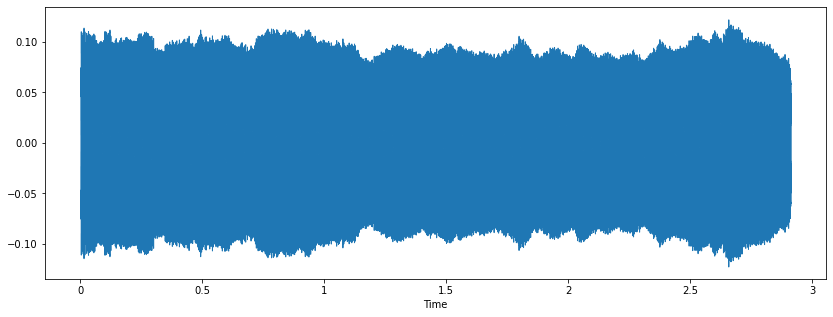

In [97]:
plt.figure(figsize=(14,5))
data, s_rate = librosa.load(c1)
librosa.display.waveshow(data, sr=s_rate)
ipd.Audio(c1)

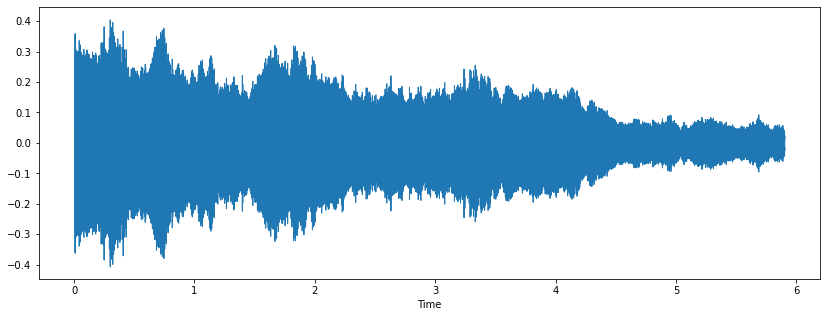

In [98]:
p1="./data/Pathology/008.wav"

plt.figure(figsize=(14,5))
data, s_rate = librosa.load(p1)
librosa.display.waveshow(data, sr=s_rate)
ipd.Audio(p1)

In [4]:
df_c=pd.DataFrame(columns=["file_name", "label"])
df_p=pd.DataFrame(columns=["file_name", "label"])

In [5]:
dir="./data/Control/"
for index, audio in enumerate(os.listdir(dir)):
    df_c.loc[index]=[audio, 0]
    
dir="./data/Pathology/"
for index, audio in enumerate(os.listdir(dir)):
    df_p.loc[index]=[audio, 1]



In [4]:
df_p.shape

(15, 2)

In [5]:
df_c.shape

(39, 2)

## Mel-Frequency Cepstral Coefficients

In [3]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_feature = librosa.feature.mfcc(y=ado, sr=s_rate, n_mfcc=40)
    mfccs_scalerd_features = np.mean(mfccs_feature.T, axis=0)
    
    return mfccs_scalerd_features

In [8]:
extracted_features=[]

In [9]:
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:02, 13.01it/s]


In [10]:
dir="./data/"
for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

15it [00:00, 15.35it/s]


In [11]:
len(extracted_features)

54

In [12]:
df_mfcc=pd.DataFrame(extracted_features, columns=["features", "label"])

In [1]:
# Final dataset with MFCC features
df_mfcc.head()

NameError: name 'df_mfcc' is not defined

In [17]:
df_mfcc.features.iloc[5].shape

(40,)

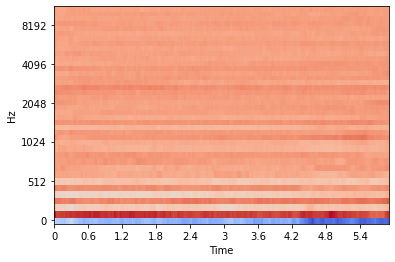

In [214]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
mfccs_feature = librosa.feature.mfcc(y=ado, sr=s_rate, n_mfcc=40)

librosa.display.specshow(mfccs_feature, x_axis='time', y_axis="mel")

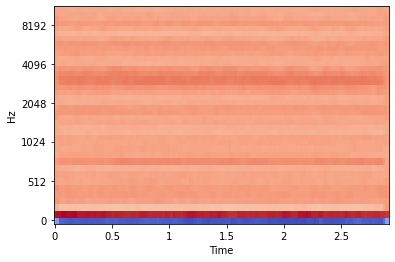

In [5]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
mels_feature = librosa.feature.mfcc(y=ado, sr=s_rate, n_mfcc=40)

librosa.display.specshow(mels_feature, x_axis='time', y_axis="mel")

# Mel-Spectrogram

In [18]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    mels_feature = librosa.feature.melspectrogram(y=ado, sr=s_rate, n_fft=2048, hop_length=512, n_mels=128)
    mels_scaled_features = librosa.power_to_db(mels_feature, ref=np.mean)
    
    return mels_scaled_features

In [19]:
extracted_features=[]

In [20]:
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:02, 18.31it/s]


In [21]:

for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

15it [00:00, 20.21it/s]


In [22]:
len(extracted_features)

54

In [23]:
df_mels=pd.DataFrame(extracted_features, columns=["features", "label"])

In [26]:
df_mels.features.iloc[5].shape

(128, 345)

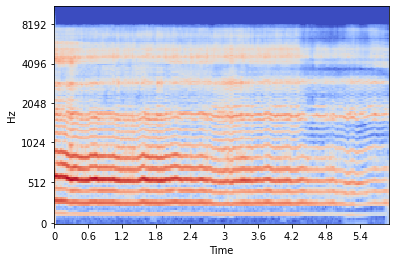

In [207]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
mels_feature = librosa.feature.melspectrogram(y=ado, sr=s_rate, n_fft=2048, hop_length=512, n_mels=128)
mels_scaled_features = librosa.power_to_db(mels_feature, ref=np.mean)

librosa.display.specshow(mels_scaled_features, x_axis='time', y_axis="mel")

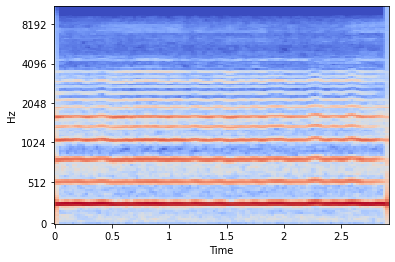

In [208]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
mels_feature = librosa.feature.melspectrogram(y=ado, sr=s_rate)
mels_scaled_features = librosa.power_to_db(mels_feature, ref=np.mean)

librosa.display.specshow(mels_scaled_features, x_axis='time', y_axis="mel")

# Spectral centroid

In [29]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    sc_feature = librosa.feature.spectral_centroid(y=ado, sr=s_rate)[0]
    return sc_feature

In [30]:
extracted_features=[]
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    
for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    
df_sc=pd.DataFrame(extracted_features, columns=["features", "label"])

39it [00:02, 19.02it/s]
15it [00:00, 21.23it/s]


In [32]:
df_sc.head()

,features,label
0,"[1399.5754053062628, 1177.957573028576, 1007.3...",0
1,"[1326.6273637729066, 1036.4236821818427, 902.8...",0
2,"[1108.0253990224428, 917.2997014275633, 762.09...",0
3,"[994.8205075232106, 879.485255231032, 799.1316...",0
4,"[1103.0010121528735, 1082.4636699755456, 1083....",0


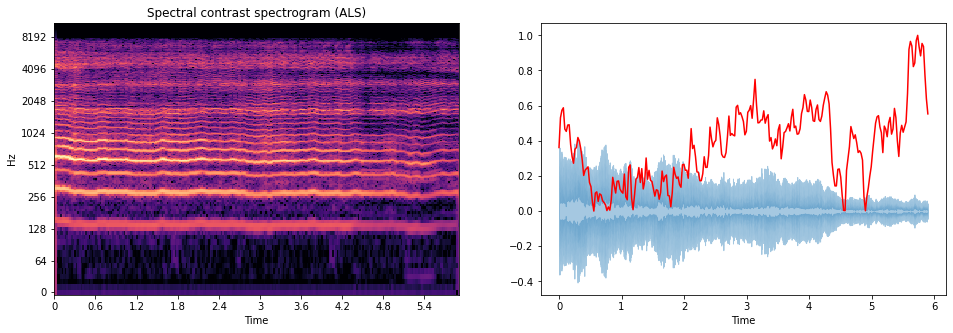

In [22]:
file="./data/Pathology/008.wav"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_centroid(y=ado, sr=s_rate)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Spectral contrast spectrogram (ALS)')

plt.subplot(1,2,2)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sr_feature = librosa.feature.spectral_centroid(y=ado, sr=s_rate)[0]
frames = range(len(sr_feature))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sr_feature), color='r')
plt.show()

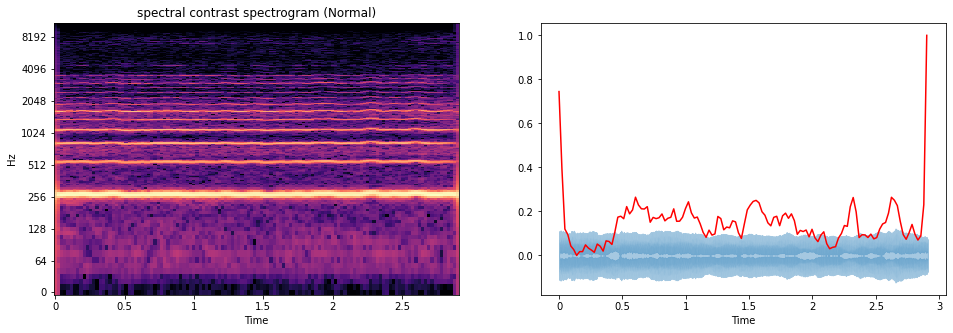

In [23]:
file="data/Control/002.wav"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_centroid(y=ado, sr=s_rate)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('spectral contrast spectrogram (Normal)')

plt.subplot(1,2,2)
sr_feature = librosa.feature.spectral_centroid(y=ado, sr=s_rate)[0]
frames = range(len(sr_feature))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sr_feature), color='r')
plt.show()

# Spectral_bandwidth

In [56]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    sb_feature = librosa.feature.spectral_bandwidth(y=ado, sr=s_rate)[0]
    sb_normal = normalize(sb_feature)
    return sb_normal

In [58]:
extracted_features=[]
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    
for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:01, 20.27it/s]


In [61]:
df_sb=pd.DataFrame(extracted_features, columns=["features", "label"])

In [62]:
df_sb.head()

,features,label
0,"[0.5356097879684156, 0.2893676991792491, 0.004...",0
1,"[1.0, 0.3746196356648519, 0.011157924652501983...",0
2,"[1.0000000000000002, 0.5334378876224046, 0.015...",0
3,"[0.568791761386436, 0.3514696067883021, 0.1363...",0
4,"[0.37328150418632866, 0.17958722753980272, 0.0...",0


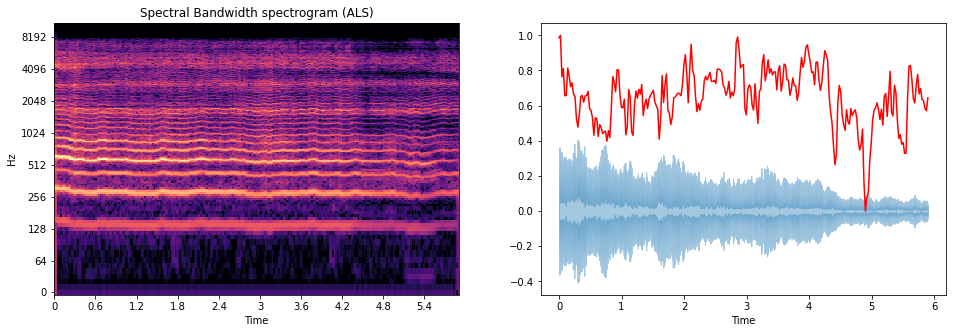

In [24]:
file="./data/Pathology/008.wav"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_bandwidth(y=ado, sr=s_rate)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Spectral Bandwidth spectrogram (ALS)')

plt.subplot(1,2,2)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sr_feature = librosa.feature.spectral_bandwidth(y=ado, sr=s_rate)[0]
frames = range(len(sr_feature))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sr_feature), color='r')
plt.show()

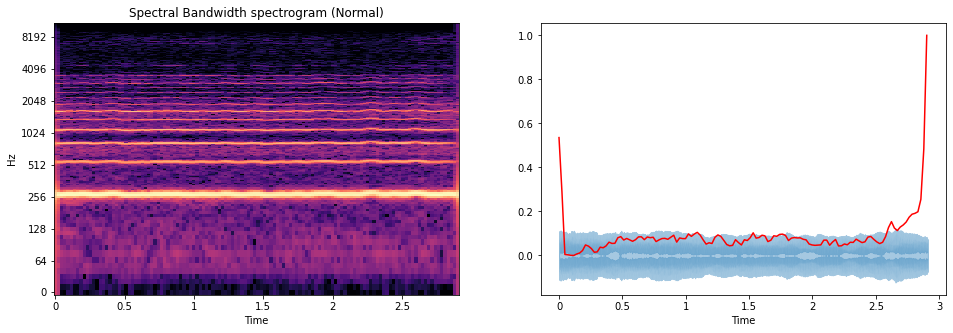

In [25]:
file="data/Control/002.wav"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_bandwidth(y=ado, sr=s_rate)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Spectral Bandwidth spectrogram (Normal)')

plt.subplot(1,2,2)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sr_feature = librosa.feature.spectral_bandwidth(y=ado, sr=s_rate)[0]
frames = range(len(sr_feature))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sr_feature), color='r')
plt.show()

# Spectral rolloff

In [27]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    sr_feature = librosa.feature.spectral_rolloff(y=ado, sr=s_rate, center=False)[0]
    sr_normal=normalize(sr_feature)
    return sr_feature

extracted_features=[]
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    

for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    
df_sr=pd.DataFrame(extracted_features, columns=["features", "label"])

39it [00:06,  6.05it/s]
15it [00:01,  9.26it/s]


In [28]:
df_sr.head()

,features,label
0,"[1636.5234375, 1636.5234375, 1647.2900390625, ...",0
1,"[1345.8251953125, 1356.591796875, 1421.1914062...",0
2,"[1281.2255859375, 1291.9921875, 1313.525390625...",0
3,"[1216.6259765625, 1216.6259765625, 1216.625976...",0
4,"[1496.5576171875, 1539.6240234375, 1582.690429...",0


[Text(0.5, 1.0, 'Rolloff spectrogram (ALS)')]

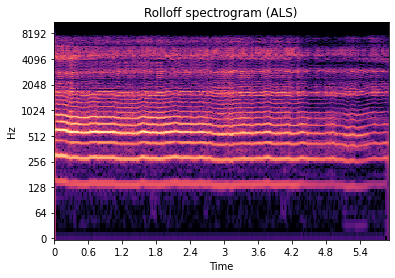

In [64]:
file="./data/Pathology/008.wav"
fig, ax = plt.subplots()
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.set(title='Rolloff spectrogram (ALS)')

[Text(0.5, 1.0, 'Rolloff spectrogram (Normal)')]

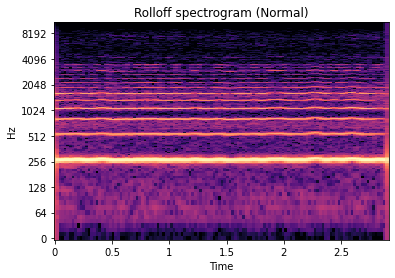

In [65]:
file="data/Control/002.wav"
fig, ax = plt.subplots()
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.set(title='Rolloff spectrogram (Normal)')

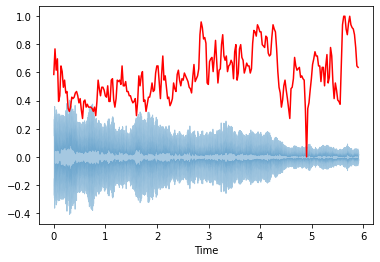

In [45]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sc_feature = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)[0]

frames = range(len(sc_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sc_feature), color='r')
plt.show()

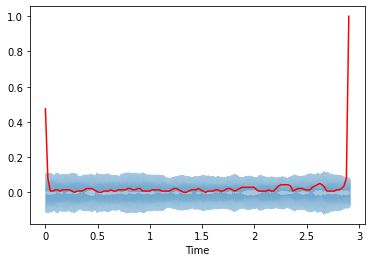

In [46]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sc_feature = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)[0]

frames = range(len(sc_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sc_feature), color='r')
plt.show()

# Spectral Contrast

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

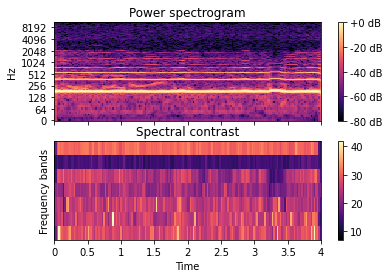

In [13]:
c1="data/Control/004.wav"
y, sr = librosa.load(c1)
S = np.abs(librosa.stft(y))
contrast=librosa.feature.spectral_contrast(y=y, sr=sr,S=S, n_fft=2048, hop_length=512)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

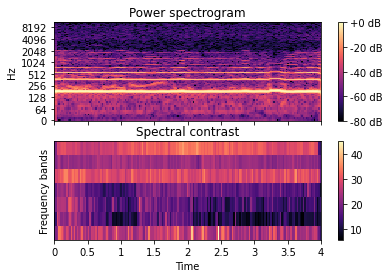

In [14]:
p1="data/Pathology/058.wav"
yp, srp = librosa.load(p1)
Sp = np.abs(librosa.stft(yp))
contrastP=librosa.feature.spectral_contrast(y=yp, sr=srp,S=Sp, n_fft=2048, hop_length=512)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrastP, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

# Tonal centroid features

In [15]:
def feature_extractor(file):
    audio, sam_rate = librosa.load(file, res_type='kaiser_fast')
    ton_feature = librosa.feature.tonnetz(y=audio, sr=sam_rate)[0]
    return ton_feature

In [17]:
extracted_features=[]
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    
for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

0it [00:00, ?it/s]C:\Users\Narender Kumar\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=1004
  return f(*args, **kwargs)
2it [00:04,  2.24s/it]C:\Users\Narender Kumar\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=879
  return f(*args, **kwargs)
6it [00:08,  1.17s/it]C:\Users\Narender Kumar\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=946
  return f(*args, **kwargs)
17it [00:14,  2.12it/s]C:\Users\Narender Kumar\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=1016
  return f(*args, **kwargs)
C:\Users\Narender Kumar\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=508
  return f(*args, **kwargs)
23it [00:16,  3.27

In [33]:
df_ton=pd.DataFrame(extracted_features, columns=["features", "label"])
df_ton.head()

,features,label
0,"[1399.5754053062628, 1177.957573028576, 1007.3...",0
1,"[1326.6273637729066, 1036.4236821818427, 902.8...",0
2,"[1108.0253990224428, 917.2997014275633, 762.09...",0
3,"[994.8205075232106, 879.485255231032, 799.1316...",0
4,"[1103.0010121528735, 1082.4636699755456, 1083....",0


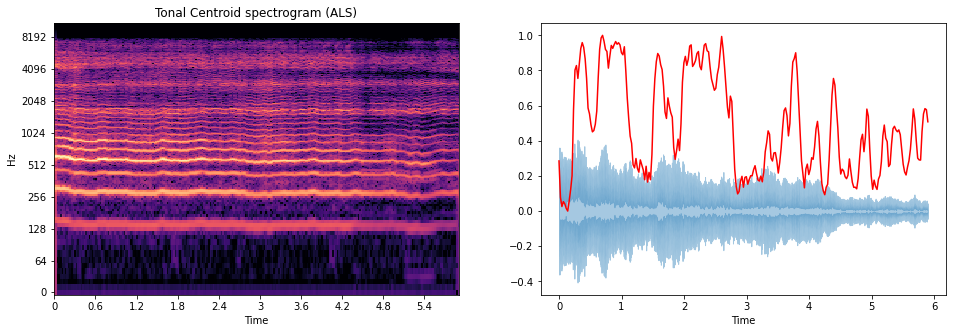

In [34]:
file="./data/Pathology/008.wav"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.tonnetz(y=ado, sr=s_rate)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Tonal Centroid spectrogram (ALS)')

plt.subplot(1,2,2)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sr_feature = librosa.feature.tonnetz(y=ado, sr=s_rate)[0]
frames = range(len(sr_feature))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sr_feature), color='r')
plt.show()

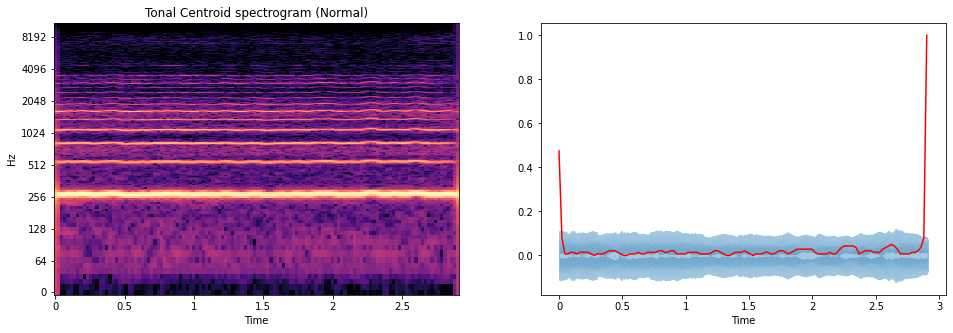

In [35]:
file="data/Control/002.wav"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Tonal Centroid spectrogram (Normal)')

plt.subplot(1,2,2)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sr_feature = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)[0]
frames = range(len(sr_feature))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sr_feature), color='r')
plt.show()

# RMS

In [190]:
def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    rms_feature = librosa.feature.rms(y=ado)[0]
    return sc_feature

In [191]:
extracted_features=[]

In [192]:
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

39it [00:02, 13.09it/s]


In [193]:

for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])

15it [00:01, 14.98it/s]


In [194]:
len(extracted_features)

54

In [195]:
df_rms=pd.DataFrame(extracted_features, columns=["features", "label"])

In [196]:
df_rms.head()

,features,label
0,"[2109.657098575484, 2115.957397428446, 2007.12...",0
1,"[2109.657098575484, 2115.957397428446, 2007.12...",0
2,"[2109.657098575484, 2115.957397428446, 2007.12...",0
3,"[2109.657098575484, 2115.957397428446, 2007.12...",0
4,"[2109.657098575484, 2115.957397428446, 2007.12...",0


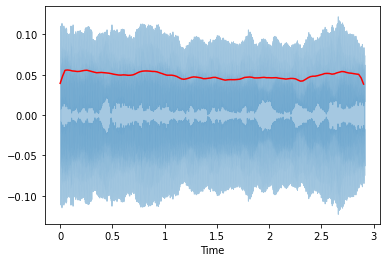

In [197]:
file="data/Control/002.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
rms_feature = librosa.feature.rms(y=ado)[0]

frames = range(len(rms_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, rms_feature, color='r')
plt.show()

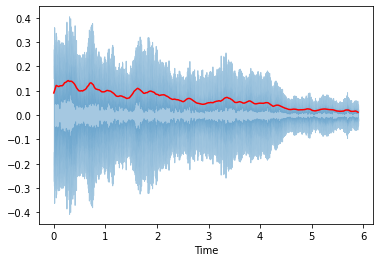

In [198]:
file="./data/Pathology/008.wav"
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
rms_feature = librosa.feature.rms(y=ado)[0]

frames = range(len(rms_feature))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, rms_feature, color='r')
plt.show()